<a href="https://colab.research.google.com/github/tejabalu/udub/blob/master/Copy_of_lab3_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 3: IMAGE PROCESSING IN PYTHON
In this lab you will practice image processing using two popular libraries in Python: Scikit-image and OpenCV.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
from google.colab.patches import cv2_imshow

import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage import filters
from skimage import data
from skimage import feature
from skimage import color
from PIL import Image

## TODO: Add any additional imports here.

## Step 1: Create project/folder
Create a folder named "lab-3" for this week's lab and copy this file `lab2.ipynb` into it. We will be using the following image [itcrowd.png](https://drive.google.com/open?id=1lSp2_CDEsckrFr8hWo-7GVcfO0FycjpP) for testing the edge detectors, although you are welcome to use a different image. If you use a different image, please upload it to a permanent url so that your notebook can be executed correclty simply by running the cells. The itcrowd.png image is stored on the following gist: 'https://raw.githubusercontent.com/wesleybeckner/UW_MSTI_510/master/lab3/itcrowd.png'

You should be able to run all code below but obviously they will not do the right thing yet. Each part of the lab has a list of TODO items that will guide you through what you need to do, which is also described in the next few steps.


(770, 1024, 3)


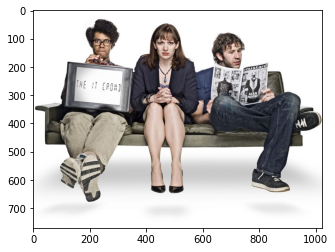

In [ ]:
# read in the itcrowd.png image
img = plt.imread('https://raw.githubusercontent.com/wesleybeckner/UW_MSTI_510/master/lab3/itcrowd.png')
plt.imshow(img)
print(img.shape)

## Step 2: Write a basic edge detector
The goal of this exercise is to practice accessing and modifying parts of an image. You will implement the find_edges function below. For this you will iterate over a grayscale image and compare the value of a pixel to the value of its neighbors. In smooth parts of the image the value of pixels do not suddenly change from one pixel to the next. In contrast an edge in the image creates a sudden difference in grayscale values. As you iterate over pixels, if the value of a pixel is very different from the left neighbor, that's a tiny vertical edge. Similarly, if the value is very different from the bottom neighbor, that's a tiny horizontal edge. 

Your function should create a new image which is black on smooth pixels, red on vertical edges, and green on horizontal edges (see example in the [lab description](https://sites.google.com/cs.washington.edu/techin510au19/labs/lab-3)). Test your function with different thresholds (for how "different" pixel need to be from their neighbor to be considered an edge).

(770, 1024)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(770, 1024, 3)


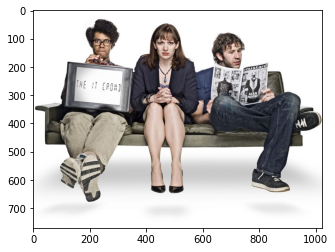

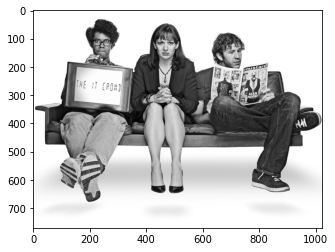

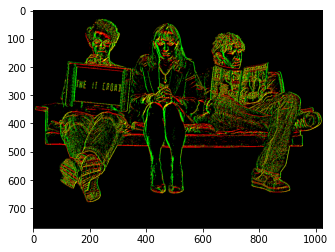

In [ ]:
def create_gray_image(img):
    # Create new image of same size
    gray_img = np.zeros((img.shape[0], img.shape[1]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            gray = (img[i,j,0] + img[i,j,1] + img[i,j,2])/3
            gray_img[i,j] = gray
    return gray_img

## TODO: Complete the implementation of this edge detection function
def find_edges(img):

    # Create new image of same size
    edge_img = np.zeros((img.shape[0], img.shape[1], 3))
    
    # Determine the w/h of the new image
    h = img.shape[0]
    w = img.shape[1]
    
    # TODO: First detect vertical edges. 
    # Iterate over the image pixel by pixel and compare 
    # the gray value of each pixel to that of the pixel to its right.
    # If the difference between the two pixel values is above a certain
    # threshold, you can declare that pixel a vertical edge.
    # The edge_img is currently all black. So you can indicate a vertical
    # edge on this image by changing the value of the pixel to red
    # Play around with different threshold values so that 
    # most edges are detected.
    threshold = 0.03

    for i in range(1, h-1):
      for j in range(1, w-1):
        if img[i+1,j]-img[i,j] > threshold:
          edge_img[i,j, 0] = 255
        else:
          edge_img[i,j, 0] = 0

    ## TODO: Next detect horizontal edges.
    ## Iterate over the image again and this time compare the value of
    ## a pixel to the value of the pixel below it and declare it a
    ## horizontal edge (by making it green in the edge_img) if they are
    ## different enough. 

    for i in range(1, h-1):
      for j in range(1, w-1):
        if img[i,j+1]-img[i,j]>threshold:
          edge_img[i,j,1] = 255
        else:
          edge_img[i,j,1] = 0   
    # Return the edge image 
    return edge_img

if __name__ == "__main__": #what does this do
    
    img = plt.imread('https://raw.githubusercontent.com/wesleybeckner/UW_MSTI_510/master/lab3/itcrowd.png')

    fig1 = plt.figure("Original image")
    plt.imshow(img)
 
    gray_img = create_gray_image(img)
    fig2 = plt.figure("Gray scale image")
    plt.imshow(gray_img, cmap='gray')
    print(gray_img.shape)
      
    edge_img = find_edges(gray_img)
    fig3 = plt.figure("Edge image")
    plt.imshow(edge_img)
    print(edge_img.shape)
      
    ## Show everything
    plt.show()

## Step 3: Experiment with other edge detectors
Edge detection is a common problem in image processing and there are a number of ways to define and detect edges. We covered a few of these in class and you might have thought of others while you were implementing your own simple edge detector in Step 2. Next, you will explore existing edge detectors that come with scikit-image. The goal of this exercise is to get you comfortable navigating and searching the scikit-image documentation, and practice using built-in functionality (e.g. passing a function the right sets of parameters in the right format).

For this step apply three different edge detection methods on the same image by updating  the code provided below:
* Roberts edge detector
* Sobel edge detector
* Canny edge detector
* Canny edge detector with sigma=3

Your starting point should be the [scikit-image documentation](http://scikit-image.org/docs/dev/index.html). Note that the format of the image that the built-in functions take and return might be different from the function you implemented in Step 2.

(770, 1024, 3)


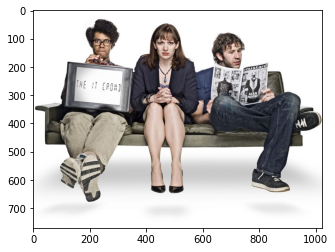

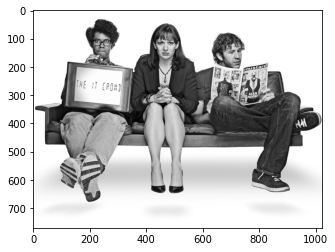

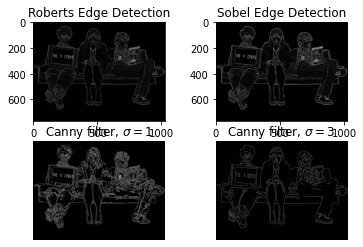

In [ ]:
## TODO: You might need to update this function to return the right image format
def create_gray_image(img):
    # Create new image of same size
    gray_img = np.zeros((img.shape[0], img.shape[1]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            gray = (img[i,j,0] + img[i,j,1] + img[i,j,2])/3
            gray_img[i,j] = gray
    return gray_img

if __name__ == "__main__":

    img = plt.imread('https://raw.githubusercontent.com/wesleybeckner/UW_MSTI_510/master/lab3/itcrowd.png')
    print(img.shape)

    fig1 = plt.figure("Original image")
    plt.imshow(img)

    gray_img = create_gray_image(img)
    fig2 = plt.figure("Gray scale image")
    plt.imshow(gray_img, cmap='gray')

    # Detect the edges using four different built-in functions/parameter settings
    # 1) Edges detected with the Roberts edge detection method
    # 2) Edges detected with the Sobel edge detection method
    # 3) Edges detected with the Canny edge detector with default value of sigma
    # 4) Edges detected with the Canny edge detector with sigma=3
    ## TODO: Replace or extend the following lines to obtain four different egde images
    edge_roberts = filters.roberts(gray_img)
    edge_sobel = filters.sobel(gray_img)
    edges_canny1 = feature.canny(gray_img, sigma=1)
    edges_canny3 = feature.canny(gray_img, sigma=3)

    # Plot all four edge images on one figure

    fig3, ax = plt.subplots(ncols=2, nrows=2)
    ax[0][0].imshow(edge_roberts, cmap=plt.cm.gray)
    ax[0][0].set_title('Roberts Edge Detection')

    ax[0][1].imshow(edge_sobel, cmap=plt.cm.gray)
    ax[0][1].set_title('Sobel Edge Detection')

    ax[1][0].imshow(edges_canny1, cmap=plt.cm.gray)
    ax[1][0].axis('off')
    ax[1][0].set_title('Canny filter, $\sigma=1$')

    ax[1][1].imshow(edges_canny3, cmap=plt.cm.gray)
    ax[1][1].axis('off')
    ax[1][1].set_title('Canny filter, $\sigma=3$')

    ## Show everything
    plt.show()

## Step 4: Build a simple post-it detector

Next you will work on images that you capture yourself. You will create a detector for a post-it of particular color of your choice. Your detector should examine the pixel colors of the camera image and classify a pixel as belonging to the post-it if its color similar to that of a post-it. Hence, you will first need to figure out what the color of your post-it is, and how it can be distinguished from pixels that are not post-its. You can do that by analyzing and experimenting with images that you capture. Be sure to inspect pixels both on the post-it and background pixels to estimate the range of color values that will allow you to discriminate the post-it from its background (but obviously this will not work if you are wearing a post-it colored sweater). You might need to do color comparisons using HSV values of pixels instead of RBG values. For that explore the [rgb2hsv function in scikit-image](http://scikit-image.org/docs/dev/api/skimage.color.html#rgb2hsv).

Once you discover the color range of your post it, implement the `detect_postit` function to determine which pixels have color that is similar to that of the post-it. Make sure your function computes fast enough so that your detector could be used on images captured from the camera at a fast frame rate. This will require eliminating nested loops that iterate over pixels one by one, but rather using NumPy's fancy indexing strategies. For example you can obtain a boolean mask by simply applying a boolean operation to the full array instead of checking each pixel one-by-one in a nested loop:  

`mask_red = img[:,:,0] > 200`

Your code should display the mask returned by the function either by annotating the original image with the mask or by displaying the mask instead or in addition to the frame. You might need to experiment further with how you are thresholding pixels until your mask corresponds accurately to the post-it as you move the post-it around. Make sure your code has a comment indicating the color of the post-it you used. Include links to at least five test images in your Colab notebook.

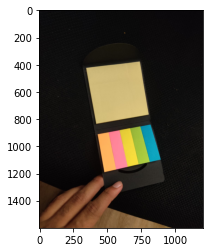

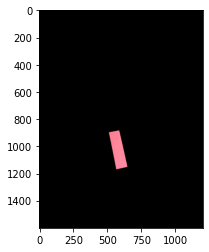

In [ ]:
# Function that takes an image and returns a mask of
# the pixels that correspond to a post-it of particular
# color.
def detect_postit(img):


    # Create the mask image of same size
    mask = np.zeros((img.shape[0], img.shape[1], img.shape[2]))

    ## TODO: Implement this function
    # Before you start implementing you should experiment
    # with the post-it and your camera to inspect the color
    # values of the pixels corresponding to the post it as well
    # as those that do not correspond to the post it. You might choose
    # your post it color based on this experimentation.
    # Once you discover the color range of your post it, implement this
    # function to determine which pixels have color that is similar to
    # that of the post-it. You might need to do this color comparison
    # using HSV values of pixels instead of RBG values.
    # Make sure your function computes fast enough so you can view the
    # detected post-it mask at the same frame rate that your camera captures
    # # images.
    
    a = (imghsv[:,:,0] > 0.6)# & (imghsv[:,:,0] < 0.2)
    b= (imghsv[:,:,1] > 0.2)# & (imghsv[:,:,1] < 1)
    c = (imghsv[:,:,2] > 0.6)# & (imghsv[:,:,2] < 1)

    # mask[:,:,:] = img[:,:,:]

    d = np.argwhere(a*b*c)
    mask[d[:,0], d[:,1]] = img[d[:,0], d[:,1]]
    # mask[d[:,0], d[:,1]] = [0, 3, 0]

    return mask

if __name__ == "__main__":

    ## TODO: Load test image

    img = plt.imread('https://raw.githubusercontent.com/tejabalu/udub/master/Sticky%20notes/1.png')
    img = img[...,:3]
    fig1 = plt.figure("Original image")
    imghsv = color.rgb2hsv(img)
    plt.imshow(img)

    mask = detect_postit(img)
    fig2 = plt.figure("Postit mask")
    plt.imshow(mask)

    # The color pink is isolated. 
    # The mask displays only the pink color and colors the rest of the images black

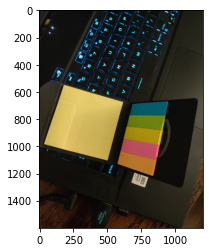

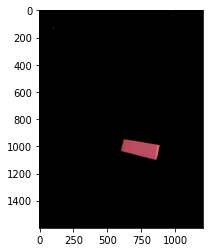

In [ ]:
img = plt.imread('https://raw.githubusercontent.com/tejabalu/udub/master/Sticky%20notes/2.png')
img = img[...,:3]
imghsv = color.rgb2hsv(img)
plt.imshow(img)
mask = detect_postit(img)
fig2 = plt.figure("Postit mask")
plt.imshow(mask)

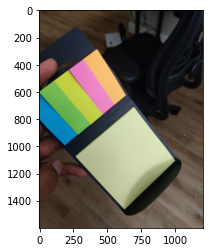

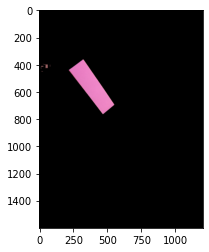

In [ ]:
img = plt.imread('https://raw.githubusercontent.com/tejabalu/udub/master/Sticky%20notes/3.png')
img = img[...,:3]
imghsv = color.rgb2hsv(img)
plt.imshow(img)
mask = detect_postit(img)
fig2 = plt.figure("Postit mask")
plt.imshow(mask)

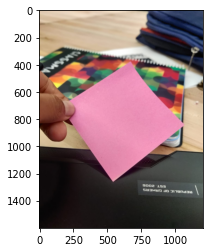

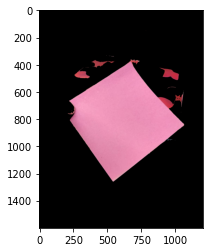

In [ ]:
img = plt.imread('https://raw.githubusercontent.com/tejabalu/udub/master/Sticky%20notes/pink.png')
img = img[...,:3]
imghsv = color.rgb2hsv(img)
plt.imshow(img)
mask = detect_postit(img)
fig2 = plt.figure("Postit mask")
plt.imshow(mask)

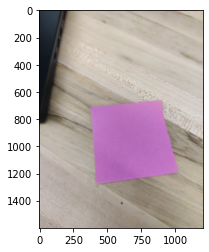

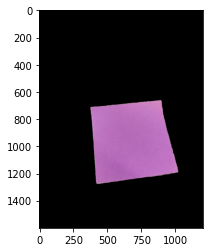

In [ ]:
img = plt.imread('https://raw.githubusercontent.com/tejabalu/udub/master/Sticky%20notes/pink1.png')
img = img[...,:3]
imghsv = color.rgb2hsv(img)
plt.imshow(img)
mask = detect_postit(img)
fig2 = plt.figure("Postit mask")
plt.imshow(mask)

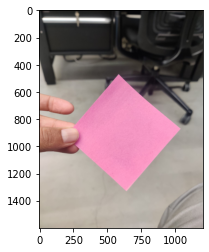

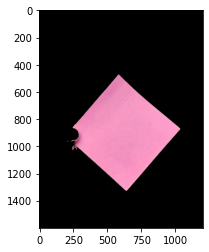

In [ ]:
img = plt.imread('https://raw.githubusercontent.com/tejabalu/udub/master/Sticky%20notes/pink2.png')
img = img[...,:3]
imghsv = color.rgb2hsv(img)
plt.imshow(img)
mask = detect_postit(img)
fig2 = plt.figure("Postit mask")
plt.imshow(mask)

**TODO:** Include links to at least five test images here. We will download your images to our drive for testing your code.

https://raw.githubusercontent.com/tejabalu/udub/master/Sticky%20notes/1.png
https://raw.githubusercontent.com/tejabalu/udub/master/Sticky%20notes/3.png
https://raw.githubusercontent.com/tejabalu/udub/master/Sticky%20notes/pink.png
https://raw.githubusercontent.com/tejabalu/udub/master/Sticky%20notes/pink1.png
https://raw.githubusercontent.com/tejabalu/udub/master/Sticky%20notes/pink2.png

## (Optional) Real-time post-it detector
If you have extra time try running your post-it detector directly on images captured from your camera and display the mask on the post-it in real time. Check out [camera.ipynb](https://colab.research.google.com/drive/1q5wx1XmJIlbAWD73A6bkCafJv733Ci7c#scrollTo=wFQGuUQzbpAs) for sample code for capturing camera images in Colab notebooks. Add your code below.



In [ ]:
from IPython.display import HTML, Audio
from IPython.display import clear_output
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import io
from PIL import Image
import time
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import cv2

VIDEO_HTML = """
<video autoplay
 width=%d height=%d style='cursor: pointer;'></video>
<script>

var video = document.querySelector('video')

navigator.mediaDevices.getUserMedia({ video: true })
  .then(stream=> video.srcObject = stream)

function getFrame() {
    var canvas = document.createElement('canvas')
    var [w,h] = [video.offsetWidth, video.offsetHeight]
    canvas.width = w
    canvas.height = h
    canvas.getContext('2d')
          .drawImage(video, 0, 0, w, h)
    return canvas.toDataURL('image/jpeg', 0.8)
}

</script>
"""
def start_camera(filename='photo.jpg', quality=0.8, size=(800,600)):
  display(HTML(VIDEO_HTML % (size[0],size[1])))

def take_photo(filename='photo.jpg', quality=0.8, size=(800,600)):
  data = eval_js("getFrame()")
  binary = b64decode(data.split(',')[1])
  f = io.BytesIO(binary)
  return np.asarray(Image.open(f))

start_camera()
time.sleep(3)

while(True):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))    
    img = take_photo() # click
    img = img[...,:3]
    imghsv = color.rgb2hsv(img)
    mask = detect_postit(img)
    ax1.imshow(img.astype('uint8'))
    ax2.imshow(mask.astype('uint8'))

    plt.show()
    time.sleep(0.2)